# pandas中的绘图函数

## 柱状图

在生成线型图的代码中加上kind='bar'(垂直柱状图)或kind='barh'(水平柱状图)即可生成柱状图。  
这时，Series和DataFrame的索引将会被用作X(bar)或Y(barh)刻度。

- 对于Series:

In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

垂直柱状图：

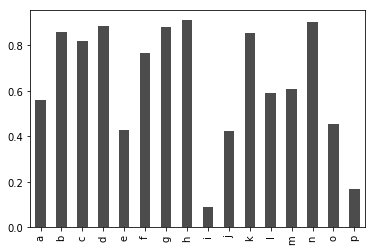

In [4]:
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', color='k', alpha=0.7)

水平柱状图：

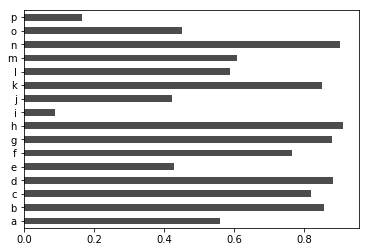

In [5]:
data.plot(kind='barh', color='k', alpha=0.7)

还可以利用value_counts图形化显示Series中各值的出现频率，如s.value_counts().plot(kind='bar')。

- 对于DataFrame:

柱状图会将每一行的值分为一组。

In [7]:
df = DataFrame(np.random.rand(6, 4),
              index=['one', 'two', 'three', 'four', 'five', 'six'],
              columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.294478,0.595829,0.283429,0.306641
two,0.601830,0.723510,0.948822,0.485334
three,0.269978,0.421200,0.103088,0.427934
four,0.164698,0.899028,0.092925,0.100394
five,0.275863,0.105792,0.626739,0.027825
six,0.335437,0.127306,0.465924,0.801630


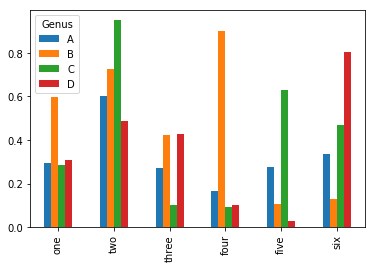

In [8]:
df.plot(kind='bar')

注意，DataFrame各列的名称"Genus"被用作了图例的标题。  
设置stacked=True即可为DataFrame生成堆积柱状图，这样每一行的值就会被堆积在一起。

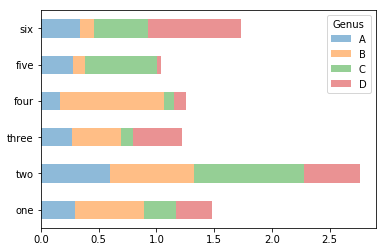

In [9]:
df.plot(kind='barh', stacked=True, alpha=0.5)

## 示例：小费数据集

若想要做一张堆积柱状图以展示每天各种聚会规模的数据点的百分比。  
先用read_csv将数据加载进来，然后根据日期和聚会规模创建一张交叉表。

In [19]:
pwd

'D:\\sunfl\\sunflower\\study\\GitHub\\pydata-book\\examples'

In [20]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### crosstab()

交叉表，可按照指定的行和列统计分组频数，也可用groupby实现。

In [34]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


一人和六人的聚会都比较少

In [36]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


然后进行规格化，使得各行的和为1(必须转换为浮点数，以避免Python中的整数除法问题)，并生成图表：

In [37]:
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

In [38]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


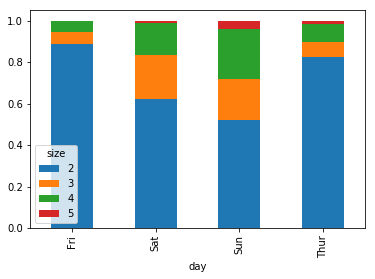

In [42]:
party_pcts.plot(kind='bar', stacked=True)

由此可以看出，聚会规模会在周末变大。